Logistics_Regressiion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.naive_bayes import  BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix




In [3]:
data= pd.read_csv("/config/workspace/Datatset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

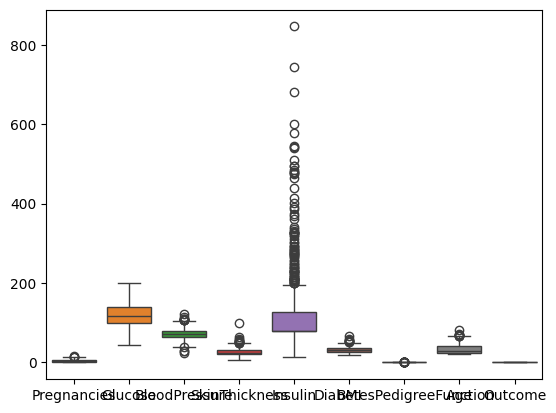

In [17]:
sns.boxplot(data=data)

In [6]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
import pickle
def scaler_std(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled=scaler.fit_transform(X_test)

    file=open('/config/workspace/Model/scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled


In [9]:
X_train_scaled,X_test_scaled=scaler_std(X_train,X_test)

In [10]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']

}

In [12]:
from sklearn.model_selection import  GridSearchCV
classifier=DecisionTreeClassifier()

In [14]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [15]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [16]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',splitter='random')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       splitter='random')

In [17]:
y_pred=classifier.predict(X_test)

In [18]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[101,  22],
       [ 30,  39]])

In [19]:
true_positive=conf_matrix[0][0]
false_positive=conf_matrix[0][1]

false_negative=conf_matrix[1][0]
true_negative=conf_matrix[1][1]

In [20]:
precision= false_positive/(false_positive+false_negative)
recall=false_negative/(false_positive+false_negative)

In [21]:
precision

0.4230769230769231

In [22]:
recall

0.5769230769230769

In [23]:
import pickle
file=open('/config/workspace/Model/model_prediction.pkl','wb')
pickle.dump(classifier,file)
file.close()

In [24]:
parameter={'C':[0.1,1,10,100,1000],
'gamma':[1,0.1,0.01,0.001,0.0001],
'kernel':['linear','rbf','polynomial']

}

In [25]:
svc=SVC(C=0.1,gamma=1,kernel='linear')
svc.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [26]:
y_pred=svc.predict(X_test)
maatrix=confusion_matrix(y_test,y_pred)

In [27]:
maatrix

array([[98, 25],
       [28, 41]])

In [28]:
true_positive=conf_matrix[0][0]
false_positive=conf_matrix[0][1]

false_negative=conf_matrix[1][0]
true_negative=conf_matrix[1][1]

In [29]:
recall=false_negative/(false_negative+false_positive)

In [30]:
recall

0.5769230769230769

In [31]:
nv=BernoulliNB()
nv.fit(X_train,y_train)


BernoulliNB()

In [32]:
y_pred_nv=nv.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7239583333333334

In [34]:
nv_matrix=confusion_matrix(y_test,y_pred_nv)

In [35]:
nv_matrix

array([[123,   0],
       [ 69,   0]])